In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [29]:
cancer = datasets.load_breast_cancer()

In [30]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [31]:
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)
print("Shape: ", cancer.data.shape)
print("File: ", cancer.filename)
print("Data: ", cancer.data[0])

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Shape:  (569, 30)
File:  breast_cancer.csv
Data:  [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [32]:
print(len(cancer.data))
print(len(cancer.target))
print(len(cancer.feature_names))

569
569
30


In [33]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [34]:
X = cancer.data
y = cancer.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [52]:
print(X_train.shape, y_train.shape)

(398, 30) (398,)


In [53]:
print(X_test.shape, y_test.shape)

(171, 30) (171,)


In [54]:
from sklearn.svm import SVC

In [60]:
clf = SVC(kernel='linear')

# Suppose we have a dataset with two features, x1 and x2. We can represent this dataset in 2D space.
# But if we have a non-linear dataset, we can't represent it in 2D space.
# So, we can use a kernel function to map the 2D data into a higher dimensional data.
# For example, we can use a polynomial kernel function to map the 2D data into 3D data.

# For example, I have 30 features in a dataset, what is the best kernel function to use?
# It depends on the dataset. You can use a linear kernel function to start with and then try other kernel functions.

In [61]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

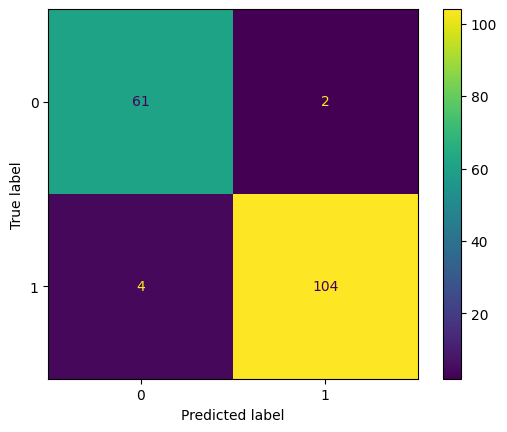

In [63]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
matrix.plot()

In [64]:
clf.score(X_test, y_test)

0.9649122807017544

In [ ]:
'''
1. SVM algorithm is implemented with kernel that transforms an input data space into the required form.
2. SVM uses a technique called "kernal trick" in which kernel takes a low dimensional input space and transforms it into a higher dimensional space.
3. In simple words, kernel converts non-separable problem to separable problems by adding more dimensions to it.
4. It makes SVM more powerful, flexible and accurate.
'''

In [75]:
rbf_svm = SVC(kernel='rbf', gamma='auto')

In [76]:
rbf_svm.fit(X_train, y_train)

SVC(gamma='auto')

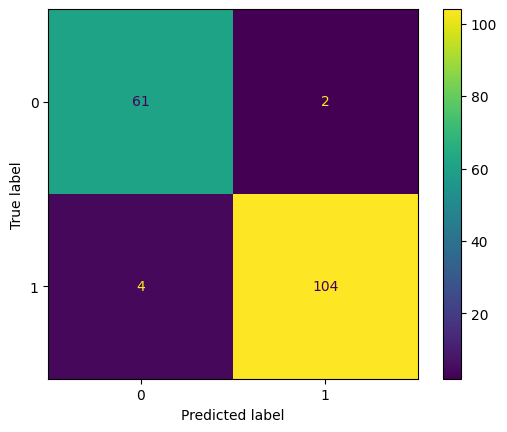

In [77]:
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
matrix.plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a non-linear dataset (circles)
X, y = datasets.make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Visualize the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Non-Linear Dataset (Circles)")
plt.legend()
plt.show()

In [79]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
